In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
import re
import contractions
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [3]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU, Bidirectional

from gensim.models import Word2Vec

from keras.callbacks import EarlyStopping
from keras.models import load_model

In [4]:
!pip install tweet-preprocessor 

In [5]:
import preprocessor as p
import numpy as np 
import pandas as pd 
import emoji
import keras

import tensorflow as tf
from keras.models import Sequential



#sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#from keras.layers.recurrent import LSTM, GRU,SimpleRNN 
from keras.layers import Dense, Embedding, LSTM, GRU, Bidirectional,SimpleRNN

from keras.layers.core import Dense, Activation, Dropout
#from keras.layers.embeddings import Embedding

#importing  libraries
#Keras
import tensorflow.keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model, model_from_json
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint



from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import plotly.graph_objects as go
import plotly.express as px
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
#import transformers
#from transformers import TFAutoModel, AutoTokenizer
from tqdm.notebook import tqdm
#from tokenizers import Tokenizer, models, pre_tokenizers, decoders, processors
from tqdm import tqdm

In [6]:
## Save clean_df to csv file
#clean_df.to_csv('clean_df.csv', index=False)
Tweet_Dataset_model = pd.read_csv('Model_data.csv')

In [7]:
Tweet_Dataset_model.head()

,tweet_id,sentiment,content,content_token,synonym,clean_tweet,clean_tweet_token
0,1.956968e+09,neutral,@dannycastillo We want to trade with someone w...,"['want', 'trade', 'someone', 'houston', 'ticke...","[['privation', 'want', 'deprivation', 'needine...",want trade someone houston ticket one,"['want', 'trade', 'someone', 'houston', 'ticke..."
1,1.956969e+09,neutral,cant fall asleep,"['cant', 'fall', 'asleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant fall asleep,"['cant', 'fall', 'asleep']"
2,1.956972e+09,neutral,No Topic Maps talks at the Balisage Markup Con...,"['topic', 'map', 'talk', 'balisage', 'markup',...","[['subject', 'topic', 'theme', 'topic', 'subje...",topic map talk balisage markup conference prog...,"['topic', 'map', 'talk', 'balisage', 'markup',..."
3,1.956975e+09,neutral,@cynthia_123 i cant sleep,"['cant', 'sleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant sleep,"['cant', 'sleep']"
4,1.956976e+09,neutral,I missed the bl***y bus!!!!!!!!,"['missed', 'bly', 'bus']","[['miss', 'lose', 'miss', 'miss', 'neglect', '...",missed bl bus,"['missed', 'bl', 'bus']"


In [8]:
Tweet_Dataset_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108628 entries, 0 to 108627
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tweet_id           8356 non-null    float64
 1   sentiment          108628 non-null  object 
 2   content            108628 non-null  object 
 3   content_token      8356 non-null    object 
 4   synonym            8356 non-null    object 
 5   clean_tweet        108391 non-null  object 
 6   clean_tweet_token  108628 non-null  object 
dtypes: float64(1), object(6)
memory usage: 5.8+ MB


In [9]:
Tweet_Dataset_model.isnull().sum()

tweet_id             100272
sentiment                 0
content                   0
content_token        100272
synonym              100272
clean_tweet             237
clean_tweet_token         0
dtype: int64

In [10]:
Tweet_Dataset_model = Tweet_Dataset_model[Tweet_Dataset_model['clean_tweet'].notna()]

In [11]:
Tweet_Dataset_model["sentiment"].value_counts()

boredom       8356
anger         8356
relief        8353
happiness     8352
fun           8352
love          8351
sadness       8349
hate          8344
enthusiasm    8343
worry         8335
surprise      8324
empty         8294
neutral       8282
Name: sentiment, dtype: int64

In [12]:
sent_to_id  = {"empty":0, "sadness":1,"enthusiasm":2,"neutral":3,"worry":4,
                        "surprise":5,"love":6,"fun":7,"hate":8,"happiness":9,"boredom":10,"relief":11,"anger":12}

In [13]:
Tweet_Dataset_model["sentiment_id"] = Tweet_Dataset_model['sentiment'].map(sent_to_id)

In [14]:
Tweet_Dataset_model.head()

,tweet_id,sentiment,content,content_token,synonym,clean_tweet,clean_tweet_token,sentiment_id
0,1.956968e+09,neutral,@dannycastillo We want to trade with someone w...,"['want', 'trade', 'someone', 'houston', 'ticke...","[['privation', 'want', 'deprivation', 'needine...",want trade someone houston ticket one,"['want', 'trade', 'someone', 'houston', 'ticke...",3
1,1.956969e+09,neutral,cant fall asleep,"['cant', 'fall', 'asleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant fall asleep,"['cant', 'fall', 'asleep']",3
2,1.956972e+09,neutral,No Topic Maps talks at the Balisage Markup Con...,"['topic', 'map', 'talk', 'balisage', 'markup',...","[['subject', 'topic', 'theme', 'topic', 'subje...",topic map talk balisage markup conference prog...,"['topic', 'map', 'talk', 'balisage', 'markup',...",3
3,1.956975e+09,neutral,@cynthia_123 i cant sleep,"['cant', 'sleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant sleep,"['cant', 'sleep']",3
4,1.956976e+09,neutral,I missed the bl***y bus!!!!!!!!,"['missed', 'bly', 'bus']","[['miss', 'lose', 'miss', 'miss', 'neglect', '...",missed bl bus,"['missed', 'bl', 'bus']",3


In [87]:
x=Tweet_Dataset_model["clean_tweet"]
#y=Tweet_Dataset_model["sentiment"]
y=Tweet_Dataset_model["sentiment_id"]

In [88]:
x

0                     want trade someone houston ticket one
1                                          cant fall asleep
2         topic map talk balisage markup conference prog...
3                                                cant sleep
4                                             missed bl bus
                                ...                        
108623    historic jesus time exist im witness hard prov...
108624      ack interpret testify horrible accounting taste
108625    ne er anything dear cultivate lapin life histo...
108626                         link ff quot work quot broke
108627              live begin retrieve solarise blcok haox
Name: clean_tweet, Length: 108391, dtype: object

In [89]:
y

0          3
1          3
2          3
3          3
4          3
          ..
108623    12
108624    12
108625    12
108626    12
108627    12
Name: sentiment_id, Length: 108391, dtype: int64

In [90]:
print("x Shape : {}".format(x.shape))
print("Y shape : {}".format(y.shape))

x Shape : (108391,)
Y shape : (108391,)


# LogisticRegression

In [91]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
X_test

104621    oh countenance clarify know lot nice citizenry...
36164                   hanging megan brook best girl world
96726                  today boring harry potter around ftw
26722                                       live pain bring
37939                                        awesome hallow
                                ...                        
39136     know get nicholas braun amp cerebrate take shi...
15819                             greg back top love nascar
49609                                 raj list scoop bandit
19054                          paycheck nothing piece paper
71306               wherefore ne er resolve wath single say
Name: clean_tweet, Length: 21679, dtype: object

In [92]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((86712,), (21679,), (86712,), (21679,))

In [93]:
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [94]:
pipe_lr.fit(X_train,y_train)

C:\Users\fatma.er\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [95]:
pipe_lr.score(X_train,y_train)

0.802841590552634

In [96]:
pipe_lr.score(X_test,y_test)

0.6102680012915724

In [97]:
alg_predictions= pipe_lr.predict(X_test)

In [98]:
y_test

104621    12
36164      6
96726     10
26722      9
37939      6
          ..
39136      6
15819      4
49609      5
19054      1
71306      8
Name: sentiment_id, Length: 21679, dtype: int64

In [99]:
alg_predictions 

array([12,  6, 10, ...,  5, 11,  8], dtype=int64)

In [101]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_test,alg_predictions)

array([[1297,   35,   34,  102,   29,   40,   17,   27,   30,   23,   28,
          44,    3],
       [  72,  562,   52,  201,  266,  100,   66,   63,  120,   80,   34,
          53,   18],
       [  29,   44, 1271,   80,   24,   31,   26,   36,   10,   40,   11,
          48,    6],
       [  83,  115,   37,  644,  248,   70,   89,   63,   33,  153,   14,
          53,   13],
       [  61,  286,   41,  346,  512,   75,   63,   59,   65,  103,   14,
          47,   10],
       [  68,   79,   59,  156,   77,  825,   81,   74,   53,   84,   20,
          58,   16],
       [  36,   55,   58,  114,   76,   70,  847,   87,   36,  182,   11,
          99,   10],
       [  54,   22,   41,   87,   63,   58,   52, 1058,   24,  121,   16,
          47,    3],
       [  55,   64,   24,   44,   58,   50,    6,   26, 1216,   18,   12,
          25,    7],
       [  54,   51,   73,  189,  107,   95,  190,  143,   19,  638,   10,
          97,    6],
       [   9,    9,    5,    9,    4,    4,    7, 

# LTSM

In [26]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(Tweet_Dataset_model["sentiment_id"] )

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
Y = onehot_encoder.fit_transform(integer_encoded)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(Tweet_Dataset_model.clean_tweet,Y, random_state=40, test_size=0.2, shuffle=True)

In [28]:


from tensorflow.keras.preprocessing.sequence import pad_sequences

In [29]:
# using keras tokenizer here
token = text.Tokenizer(num_words=None)
max_len = 160
Epoch = 5
token.fit_on_texts(list(X_train) + list(X_test))
X_train_pad = pad_sequences(token.texts_to_sequences(X_train), maxlen=max_len)
X_test_pad = pad_sequences(token.texts_to_sequences(X_test), maxlen=max_len)

In [30]:
w_idx = token.word_index

In [31]:
embed_dim = 160
lstm_out = 250

model = Sequential()
model.add(Embedding(len(w_idx) +1 , embed_dim,input_length = X_test_pad.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(keras.layers.core.Dense(13, activation='softmax'))
#adam rmsprop 
model.compile(loss = "categorical_crossentropy", optimizer='adam',metrics = ['accuracy'])
print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 160, 160)          5269760   
                                                                 
 spatial_dropout1d (SpatialD  (None, 160, 160)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 250)               411000    
                                                                 
 dense (Dense)               (None, 13)                3263      
                                                                 
Total params: 5,684,023
Trainable params: 5,684,023
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
# Calculate pre-training accuracy 
score = model.evaluate(X_test_pad, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy) 

678/678 [==============================] - 85s 125ms/step - loss: 2.5650 - accuracy: 0.0774
Pre-training accuracy: 7.7356%


In [33]:
batch_size = 32

In [34]:
model_all=model.fit(X_train_pad, y_train, epochs = Epoch, batch_size=batch_size,validation_data=(X_test_pad, y_test))


Epoch 1/5
2710/2710 [==============================] - 3037s 1s/step - loss: 1.6908 - accuracy: 0.4304 - val_loss: 1.2587 - val_accuracy: 0.5783
Epoch 2/5
2710/2710 [==============================] - 2799s 1s/step - loss: 0.9945 - accuracy: 0.6638 - val_loss: 1.0711 - val_accuracy: 0.6375
Epoch 3/5
2710/2710 [==============================] - 2393s 883ms/step - loss: 0.7106 - accuracy: 0.7588 - val_loss: 1.0055 - val_accuracy: 0.6703
Epoch 4/5
2710/2710 [==============================] - 2300s 849ms/step - loss: 0.5431 - accuracy: 0.8166 - val_loss: 1.0433 - val_accuracy: 0.6772
Epoch 5/5
2710/2710 [==============================] - 2447s 903ms/step - loss: 0.4361 - accuracy: 0.8507 - val_loss: 1.0623 - val_accuracy: 0.6923


In [35]:
score = model.evaluate(X_train_pad, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test_pad, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9110503792762756
Testing Accuracy:  0.6922828555107117


In [36]:
test_accuracy=model.evaluate(X_test_pad,y_test,verbose=0)
print(test_accuracy[1])

0.6922828555107117


In [37]:
#model.predict_classes(X_test)
predict_x=model.predict(X_test_pad) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

678/678 [==============================] - 81s 119ms/step
[12  1 10 ...  5 11  8]


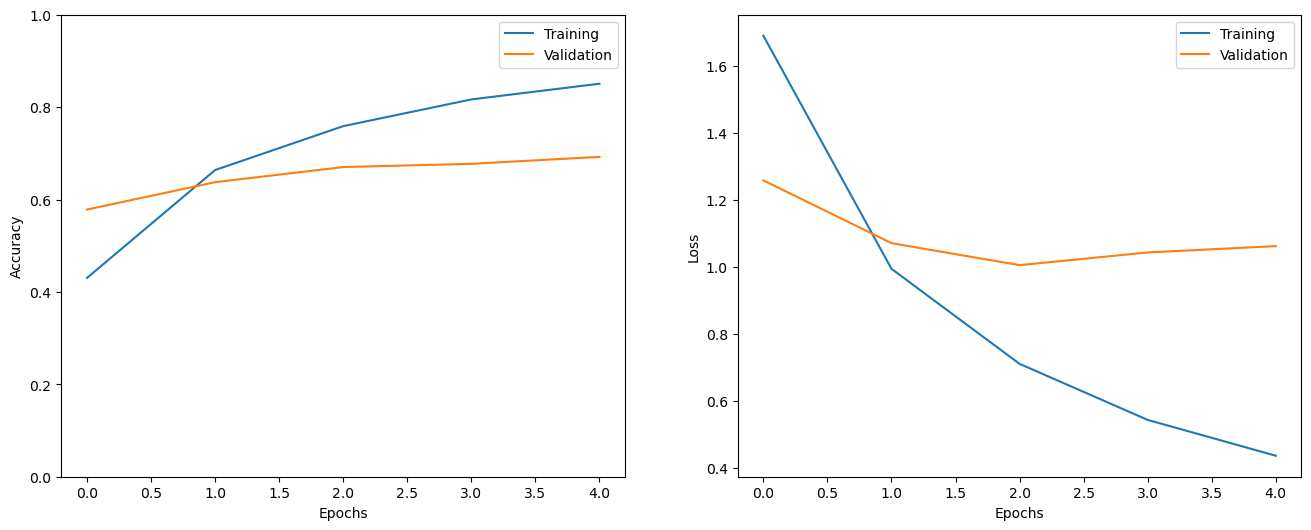

In [38]:
def show_history(model_all):
    epochs_trained = len(model_all.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), model_all.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), model_all.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), model_all.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), model_all.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

show_history(model_all)

In [66]:
train_hist = pd.DataFrame(model_all.history)
train_hist

,loss,accuracy,val_loss,val_accuracy
0,1.690779,0.430356,1.258674,0.578302
1,0.994498,0.663830,1.071131,0.637529
2,0.710577,0.758834,1.005460,0.670280
3,0.543106,0.816634,1.043287,0.677245
4,0.436129,0.850655,1.062278,0.692283


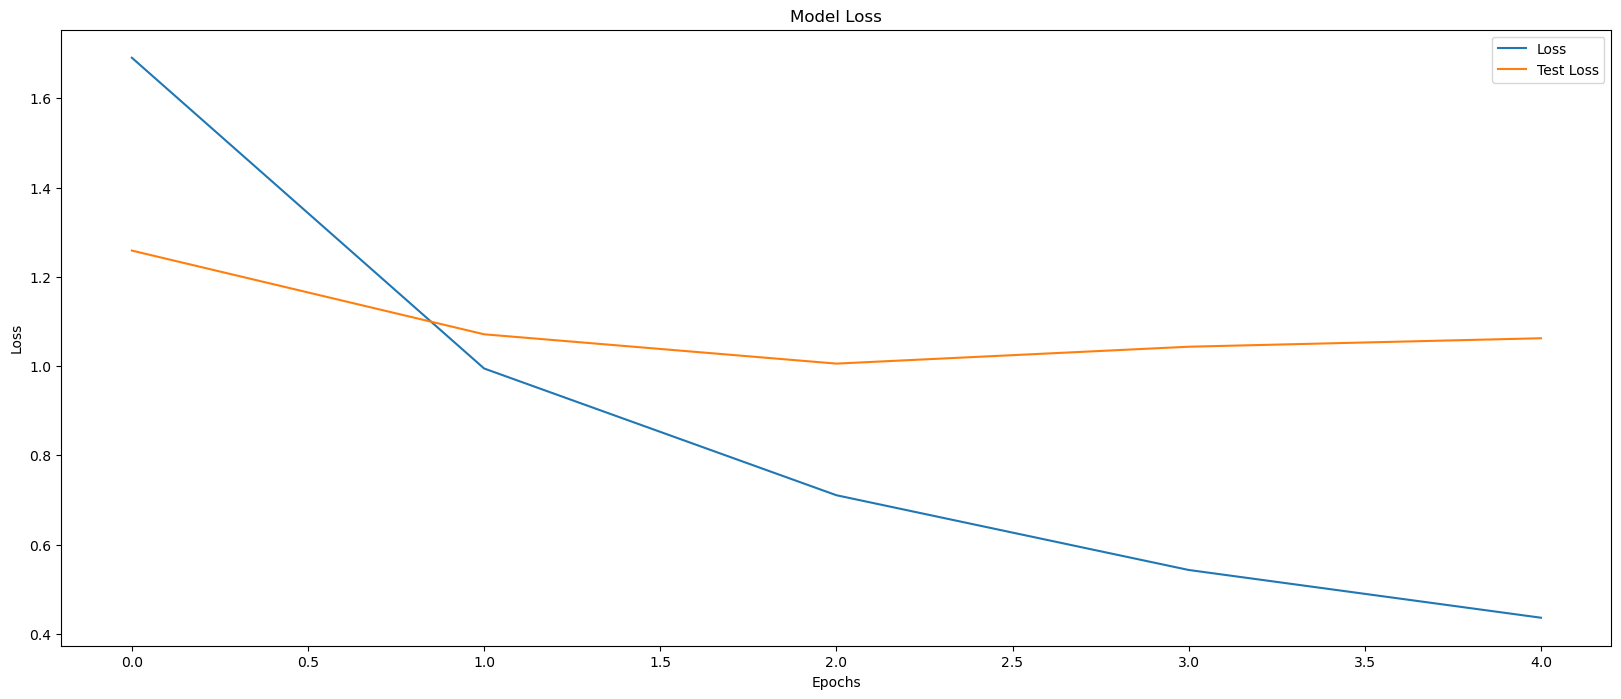

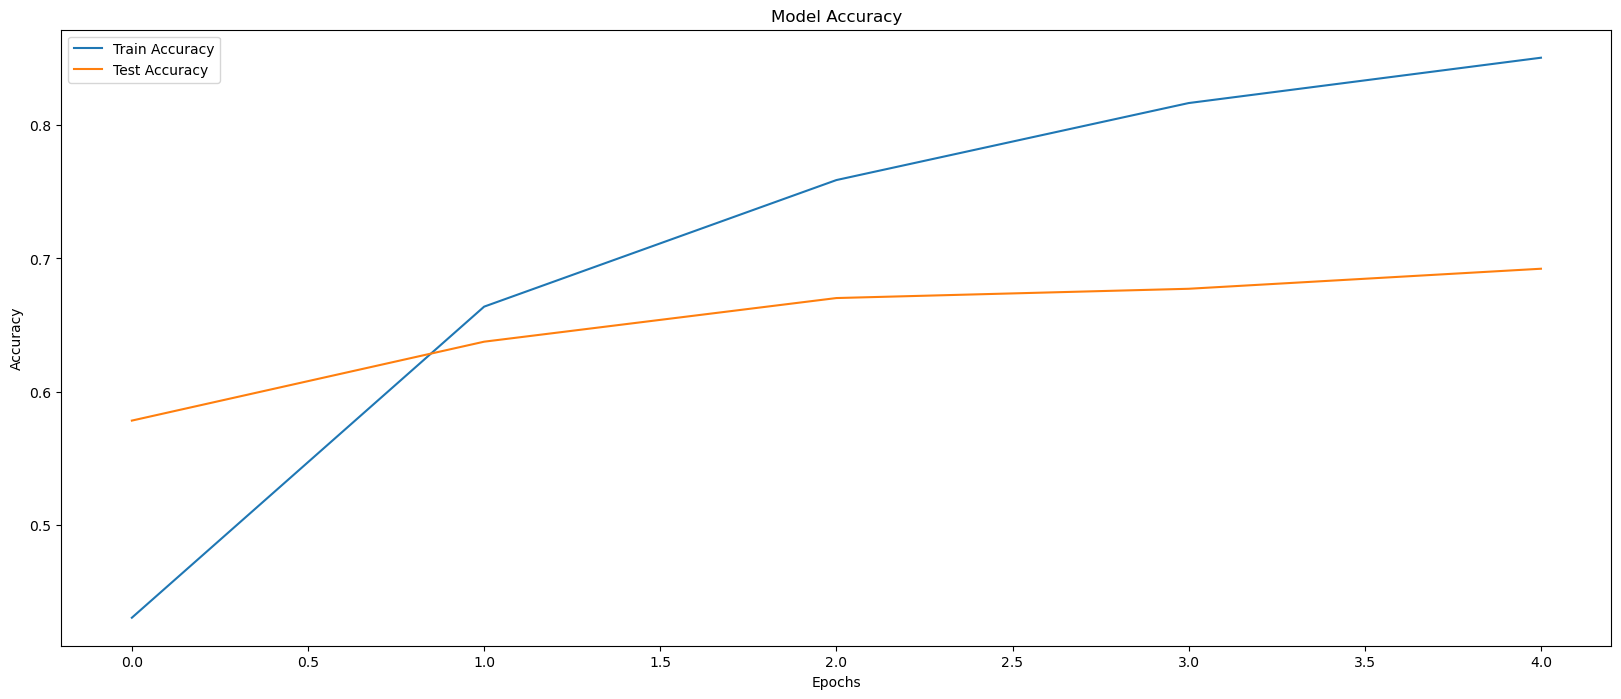

In [67]:
plt.figure(figsize=(20,8))
plt.plot(train_hist[['loss','val_loss']])
plt.legend(['Loss','Test Loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(20,8))
plt.plot(train_hist[['accuracy','val_accuracy']])
plt.legend(['Train Accuracy','Test Accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [69]:
print(train_hist["val_accuracy"].describe())

count    5.000000
mean     0.651128
std      0.045363
min      0.578302
25%      0.637529
50%      0.670280
75%      0.677245
max      0.692283
Name: val_accuracy, dtype: float64


In [41]:
## Save clean_df to csv file
#clean_df.to_csv('clean_df.csv', index=False)
movie_predict = pd.read_csv('Movie_df_model.csv')

In [42]:
movie_predict

,id,text,speaker,reply_to,conversation_id,meta.movie_id,text_movie_token,clean_text
0,L1045,They do not!,u0,L1044,L1044,m0,[],they do not
1,L1044,They do to!,u2,NaN,L1044,m0,[],they do to
2,L985,I hope so.,u0,L984,L984,m0,['hope'],i hope so
3,L984,She okay?,u2,NaN,L984,m0,['okay'],she okay
4,L925,Let's go.,u0,L924,L924,m0,"['let', 'go']",let s go
...,...,...,...,...,...,...,...,...
304708,L666371,Lord Chelmsford seems to want me to stay back ...,u9030,L666370,L666369,m616,"['lord', 'chelmsford', 'seems', 'want', 'stay'...",lord chelmsford seems to want me to stay back ...
304709,L666370,I'm to take the Sikali with the main column to...,u9034,L666369,L666369,m616,"['im', 'take', 'sikali', 'main', 'column', 'ri...",i m to take the sikali with the main column to...
304710,L666369,"Your orders, Mr Vereker?",u9030,NaN,L666369,m616,"['order', 'mr', 'vereker']",your orders mr vereker
304711,L666257,"Good ones, yes, Mr Vereker. Gentlemen who can ...",u9030,L666256,L666256,m616,"['good', 'one', 'yes', 'mr', 'vereker', 'gentl...",good ones yes mr vereker gentlemen who can ...


In [43]:
movie_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304713 entries, 0 to 304712
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                304713 non-null  object
 1   text              304446 non-null  object
 2   speaker           304713 non-null  object
 3   reply_to          221616 non-null  object
 4   conversation_id   304713 non-null  object
 5   meta.movie_id     304713 non-null  object
 6   text_movie_token  304713 non-null  object
 7   clean_text        304446 non-null  object
dtypes: object(8)
memory usage: 18.6+ MB


In [44]:
movie_predict.isnull().sum()

id                      0
text                  267
speaker                 0
reply_to            83097
conversation_id         0
meta.movie_id           0
text_movie_token        0
clean_text            267
dtype: int64

In [45]:
movie_predict2 = movie_predict[movie_predict['text'].notna()]

In [57]:
movie_predict2.isnull().sum()

id                      0
text                    0
speaker                 0
reply_to            83032
conversation_id         0
meta.movie_id           0
text_movie_token        0
clean_text              0
dtype: int64

In [56]:

print("Predicted sentiment : ",classes_x)

Predicted sentiment :  [12  1 10 ...  5 11  8]
